In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
data=pd.read_csv("../../advertising.csv")

In [8]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
data.info

<bound method DataFrame.info of      cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]>

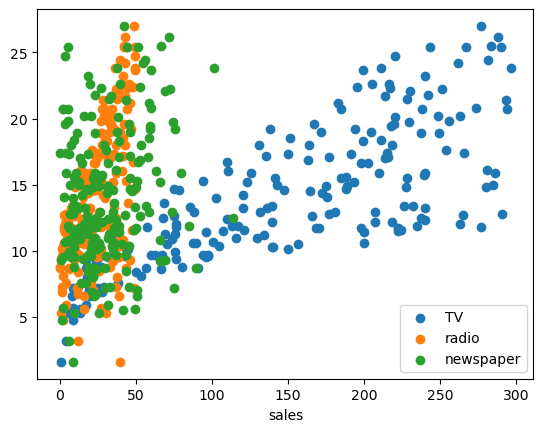

In [103]:
for column in ['TV','radio','newspaper']:
    plt.scatter(data[column],data["sales"],label=column)
    plt.xlabel('sales')
    # plt.ylabel(column)
    plt.legend()


In [105]:
X=data[['TV','radio','newspaper']]

In [107]:
Y=data["sales"]


In [109]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [111]:
lr=LinearRegression()

In [113]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [115]:
lr.fit(x_train,y_train)

LinearRegression()

In [117]:
predicted=lr.predict(x_test)

In [119]:
print("MAE",mean_absolute_error(y_test,predicted))
print("MSE",mean_squared_error(y_test,predicted))
print("F1-Score",r2_score(y_test,predicted))

MAE 1.629319320523397
MSE 5.779805950800092
F1-Score 0.8279765580190273


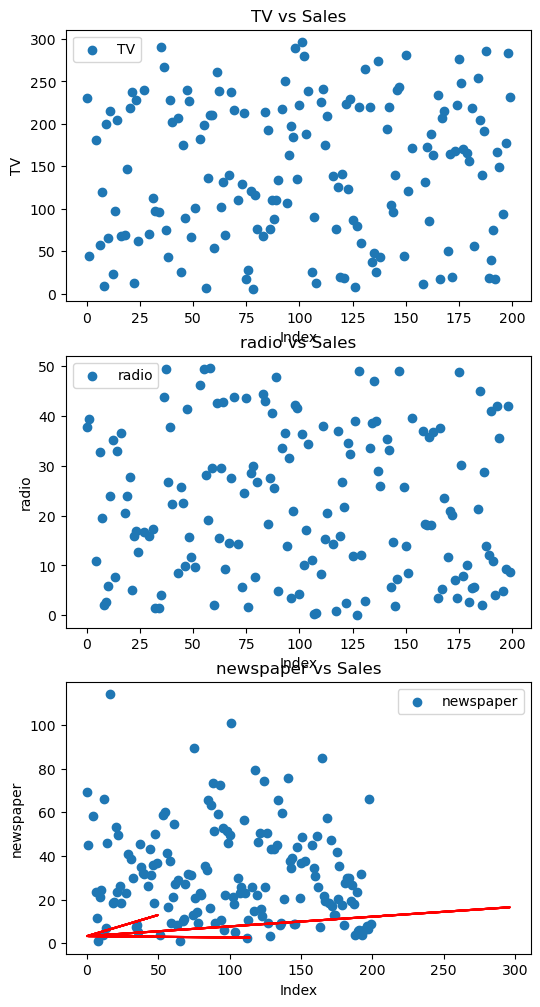

In [139]:
# plt.scatter(x_test,y_test)
columns=['TV','radio','newspaper']
fig, axes = plt.subplots(nrows=len( columns), ncols=1, figsize=(6, 4*len(columns)))
for i,column in enumerate(columns):
    axes[i].scatter(x_train.index, x_train[column], label=column)
    axes[i].set_title(f'{column} vs Sales')
    axes[i].set_xlabel('Index')
    y_line=lr.intercept_+lr.coef_*x_train
    plt.plot(x_train,y_line,color='red')
    
    axes[i].set_ylabel(column)
    axes[i].legend()

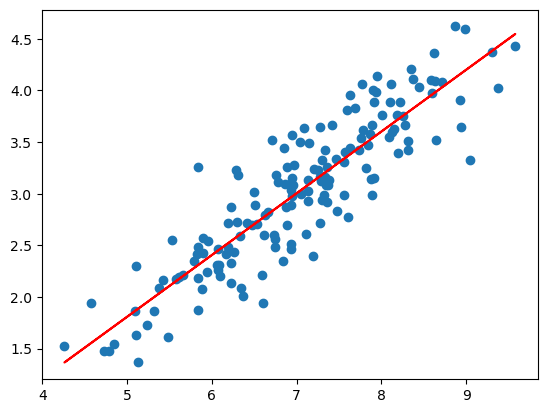

In [51]:
plt.scatter(x_train,y_train)
y_line=lr.intercept_+lr.coef_*x_train
plt.plot(x_train,y_line,color='red')

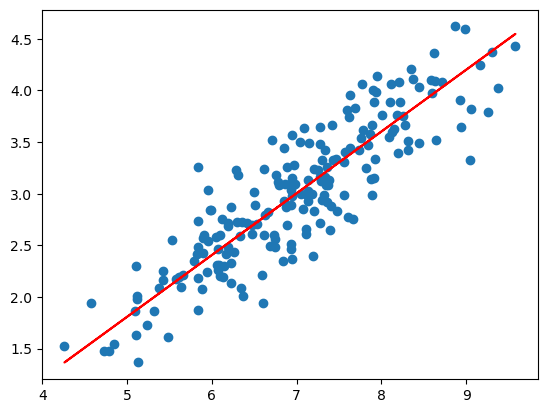

In [53]:
plt.scatter(X,Y)
y_line=lr.intercept_+lr.coef_*X
plt.plot(X,y_line,color='red')
